In [1]:
from sklearn.datasets import load_breast_cancer
import xgboost as xgb
from time import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from skimage.featurea.

### $\gamma$ 值的调节

In [2]:
cancer_data = load_breast_cancer()

In [3]:
X = cancer_data.data
Y = cancer_data.target

In [4]:
X.shape

(569, 30)

In [5]:
dfull = xgb.DMatrix(X, Y)

In [9]:
# 设定参数(回归)
param1 = {"silent": False
          , "obj":"binary:logistic"
          , "gamma":0
          , "tree_method":"auto"
         }

param2 = {"silent": True
          , "obj":"binary:logistic"
          , "gamma":10
         }

num_round = 180
n_fold = 5

In [16]:
t0 = time()
cvresult1 = xgb.cv(param1,dfull, num_round, n_fold, metrics=("error", "logloss", "auc"))
print("GPU Consume time :",time() - t0)

[08:49:52] WARNING: /home/gavin/Software/xgboost/src/learner.cc:489: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:49:52] WARNING: /home/gavin/Software/xgboost/src/learner.cc:489: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:49:52] WARNING: /home/gavin/Software/xgboost/src/learner.cc:489: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip throug

In [17]:
cvresult1

,train-error-mean,train-error-std,train-logloss-mean,train-logloss-std,train-auc-mean,train-auc-std,test-error-mean,test-error-std,test-logloss-mean,test-logloss-std,test-auc-mean,test-auc-std
0,0.002637,0.000880,0.439778,0.001135,0.997299,0.001287,0.072039,0.020999,0.476575,0.011264,0.961288,0.016655
1,0.002637,0.000880,0.293852,0.002295,0.997257,0.001377,0.064974,0.023195,0.357841,0.020566,0.960808,0.017357
2,0.002637,0.000880,0.201224,0.001810,0.999547,0.000466,0.064974,0.023195,0.281053,0.028587,0.974201,0.016729
3,0.002197,0.001390,0.139805,0.002253,0.999904,0.000126,0.064974,0.023195,0.231762,0.030578,0.979697,0.013645
4,0.001757,0.000879,0.098738,0.002558,0.999956,0.000065,0.064974,0.023195,0.200346,0.032641,0.978819,0.014675
...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.000000,0.000000,0.000264,0.000011,1.000000,0.000000,0.056171,0.025132,0.208604,0.132579,0.985959,0.008797
176,0.000000,0.000000,0.000264,0.000011,1.000000,0.000000,0.056171,0.025132,0.208604,0.132579,0.985959,0.008797
177,0.000000,0.000000,0.000264,0.000011,1.000000,0.000000,0.056171,0.025132,0.208604,0.132579,0.985959,0.008797
178,0.000000,0.000000,0.000264,0.000011,1.000000,0.000000,0.056171,0.025132,0.208604,0.132579,0.985959,0.008797


In [18]:
t1 = time()
cvresult2 = xgb.cv(param2,dfull, num_round, n_fold, metrics=("error"))
print("CPU Consume time :", time() - t1)

[08:49:57] WARNING: /home/gavin/Software/xgboost/src/learner.cc:489: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:49:57] WARNING: /home/gavin/Software/xgboost/src/learner.cc:489: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:49:57] WARNING: /home/gavin/Software/xgboost/src/learner.cc:489: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip throug

In [14]:
cvresult1.head()

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.002637,0.000880,0.072039,0.020999
1,0.002637,0.000880,0.064974,0.023195
2,0.002637,0.000880,0.064974,0.023195
3,0.002197,0.001390,0.064974,0.023195
4,0.001757,0.000879,0.064974,0.023195


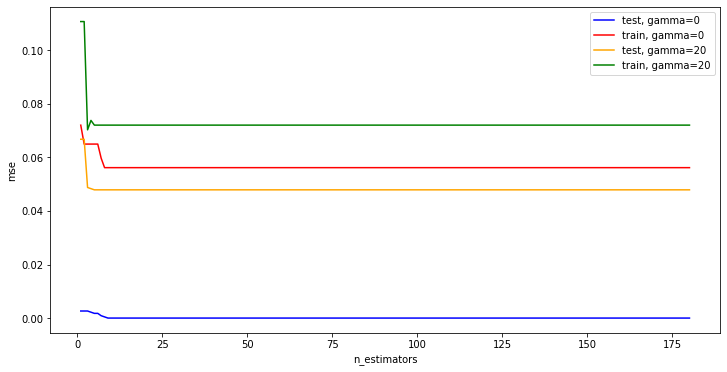

In [15]:
# 画图看效果
plt.figure(figsize=(12, 6))
plt.plot(range(1, 181), cvresult1.iloc[:, 0], c="blue", label = "test, gamma=0")
plt.plot(range(1, 181), cvresult1.iloc[:, 2], c="red", label = "train, gamma=0")
plt.plot(range(1, 181), cvresult2.iloc[:, 0], c="orange", label = "test, gamma=20")
plt.plot(range(1, 181), cvresult2.iloc[:, 2], c="green", label = "train, gamma=20")
plt.xlabel("n_estimators")
plt.ylabel("mse")
plt.legend()
plt.savefig("imgs/11.svg")
plt.show()

### 使用GPU调节参数

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.25)

In [33]:
XGBC = xgb.XGBClassifier(verbosity=0)

In [32]:
t0 = time()
XGBC.fit(xtrain, ytrain
print(time.time() - t0)

XGBoostError: [08:54:24] /home/gavin/Software/xgboost/src/gbm/gbtree.cc:459: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.
Stack trace:
  [bt] (0) /home/gavin/anaconda3/lib/python3.6/site-packages/xgboost/lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x7c) [0x7fab1b1de29c]
  [bt] (1) /home/gavin/anaconda3/lib/python3.6/site-packages/xgboost/lib/libxgboost.so(xgboost::gbm::GBTree::GetPredictor(xgboost::HostDeviceVector<float> const*, xgboost::DMatrix*) const+0x507) [0x7fab1b29c7d7]
  [bt] (2) /home/gavin/anaconda3/lib/python3.6/site-packages/xgboost/lib/libxgboost.so(xgboost::gbm::GBTree::PredictBatch(xgboost::DMatrix*, xgboost::PredictionCacheEntry*, bool, unsigned int)+0x45) [0x7fab1b29cac5]
  [bt] (3) /home/gavin/anaconda3/lib/python3.6/site-packages/xgboost/lib/libxgboost.so(xgboost::LearnerImpl::PredictRaw(xgboost::DMatrix*, xgboost::PredictionCacheEntry*, bool, unsigned int) const+0x5a) [0x7fab1b2c3f8a]
  [bt] (4) /home/gavin/anaconda3/lib/python3.6/site-packages/xgboost/lib/libxgboost.so(xgboost::LearnerImpl::UpdateOneIter(int, std::shared_ptr<xgboost::DMatrix>)+0x2a2) [0x7fab1b2c6de2]
  [bt] (5) /home/gavin/anaconda3/lib/python3.6/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x68) [0x7fab1b1d41b8]
  [bt] (6) /home/gavin/anaconda3/lib/python3.6/lib-dynload/../../libffi.so.6(ffi_call_unix64+0x4c) [0x7fab77079ec0]
  [bt] (7) /home/gavin/anaconda3/lib/python3.6/lib-dynload/../../libffi.so.6(ffi_call+0x22d) [0x7fab7707987d]
  [bt] (8) /home/gavin/anaconda3/lib/python3.6/lib-dynload/_ctypes.cpython-36m-x86_64-linux-gnu.so(_ctypes_callproc+0x2ce) [0x7fab7728e82e]

